## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
df = pd.read_csv("data/PuneHouseData.csv")
df.head(10)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.00,Balaji Nagar
6,Super built-up Area,18-May,4 BHK,Jaades,2732,4.0,NaN,204.00,Baner
7,Super built-up Area,Ready To Move,4 BHK,Brway G,3300,4.0,NaN,600.00,Baner road
8,Super built-up Area,Ready To Move,3 BHK,NaN,1310,3.0,1.0,63.25,Bhandarkar Road
9,Plot Area,Ready To Move,6 Bedroom,NaN,1020,6.0,NaN,370.00,Bhavani Peth


## EDA

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

In [7]:
df.society.value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [8]:
df.site_location.value_counts()

Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: site_location, Length: 97, dtype: int64

In [9]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

## Data preprocessing and handling missing data

In [10]:
df1 = df.drop(["area_type","availability","society"], axis=1)

In [11]:
df1.isnull().sum()

size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [12]:
df1.head(10)

,size,total_sqft,bath,balcony,price,site_location
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,3 BHK,1521,3.0,1.0,95.00,Aundh
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road
5,2 BHK,1170,2.0,1.0,38.00,Balaji Nagar
6,4 BHK,2732,4.0,NaN,204.00,Baner
7,4 BHK,3300,4.0,NaN,600.00,Baner road
8,3 BHK,1310,3.0,1.0,63.25,Bhandarkar Road
9,6 Bedroom,1020,6.0,NaN,370.00,Bhavani Peth


In [13]:
# Filling the null values of bath with the median value of the entire dataset
import math
median_bath = math.floor(df1.bath.median())
df1.bath = df1.bath.fillna(median_bath)

In [14]:
# Assuming that null value of balcony means 0 balcony in the house
df1.balcony = df1.balcony.fillna('0')

In [15]:
df2 = df1.dropna()

In [16]:
df2['Bedrooms'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\image\AppData\Local\Temp\ipykernel_5232\1166185864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bedrooms'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df2.head(10)

,size,total_sqft,bath,balcony,price,site_location,Bedrooms
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,1.0,95.00,Aundh,3
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road,2
5,2 BHK,1170,2.0,1.0,38.00,Balaji Nagar,2
6,4 BHK,2732,4.0,0,204.00,Baner,4
7,4 BHK,3300,4.0,0,600.00,Baner road,4
8,3 BHK,1310,3.0,1.0,63.25,Bhandarkar Road,3
9,6 Bedroom,1020,6.0,0,370.00,Bhavani Peth,6


In [18]:
df2.shape

(13303, 7)

In [19]:
df3 = df2.drop('size', axis=1)
df3.head()

,total_sqft,bath,balcony,price,site_location,Bedrooms
0,1056,2.0,1.0,39.07,Alandi Road,2
1,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,1440,2.0,3.0,62.00,Anandnagar,3
3,1521,3.0,1.0,95.00,Aundh,3
4,1200,2.0,1.0,51.00,Aundh Road,2


In [20]:
df3.Bedrooms.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
df3.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [22]:
df3.site_location.unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [23]:
df3.balcony.unique()

array([1.0, 3.0, '0', 2.0, 0.0], dtype=object)

In [24]:
df3['balcony'] = df3['balcony'].astype(float) 
df3.balcony.unique()

array([1., 3., 0., 2.])

In [25]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def average_sqft(x):
    a = x.split('-')
    if len(a) == 2:
        return (float(a[0].strip())+float(a[1].strip()))/2
    try:
        return float(x)
    except:
        return None

In [27]:
df3['total_sqft'] = df3['total_sqft'].apply(average_sqft)
df3

,total_sqft,bath,balcony,price,site_location,Bedrooms
0,1056.0,2.0,1.0,39.07,Alandi Road,2
1,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4
2,1440.0,2.0,3.0,62.00,Anandnagar,3
3,1521.0,3.0,1.0,95.00,Aundh,3
4,1200.0,2.0,1.0,51.00,Aundh Road,2
...,...,...,...,...,...,...
13315,3453.0,4.0,0.0,231.00,Pashan,5
13316,3600.0,5.0,0.0,400.00,Paud Road,4
13317,1141.0,2.0,1.0,60.00,Pirangut,2
13318,4689.0,4.0,1.0,488.00,Prabhat Road,4


In [28]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
df3.price.unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [30]:
df3 = df3.dropna()

In [31]:
df3.isnull().sum()

total_sqft       0
bath             0
balcony          0
price            0
site_location    0
Bedrooms         0
dtype: int64

## Visualization

Text(0, 0.5, 'Price')

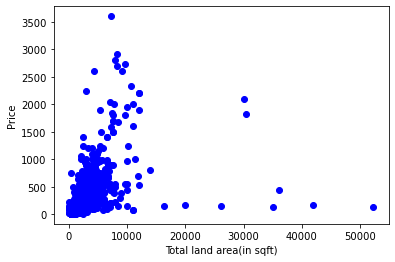

In [32]:
plt.scatter(df3.total_sqft, df3.price, color='blue')
plt.xlabel("Total land area(in sqft)")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

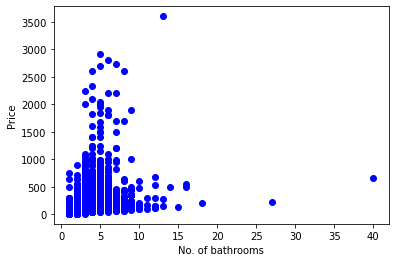

In [33]:
plt.scatter(df3.bath, df3.price, color='blue')
plt.xlabel("No. of bathrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

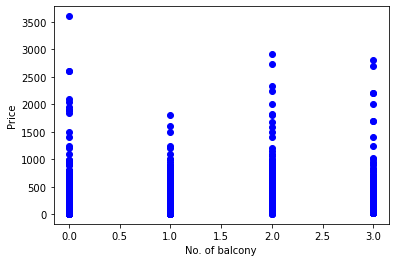

In [34]:
plt.scatter(df3.balcony, df3.price, color='blue')
plt.xlabel("No. of balcony")
plt.ylabel("Price")

# Outlier Removal

## Encoding categorical data

In [35]:
dummies = pd.get_dummies(df3.site_location)
dummies.head(20)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df4 = pd.concat([df3,dummies],axis='columns')
df4.head()

,total_sqft,bath,balcony,price,site_location,Bedrooms,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,1056.0,2.0,1.0,39.07,Alandi Road,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,Anandnagar,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,Aundh,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,Aundh Road,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df5 = df4.drop('site_location',axis='columns')
df5.head(10)

,total_sqft,bath,balcony,price,Bedrooms,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,1056.0,2.0,1.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,1.0,38.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,0.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3300.0,4.0,0.0,600.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1310.0,3.0,1.0,63.25,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1020.0,6.0,0.0,370.00,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Defining the variables

In [38]:
df5.shape

(13257, 102)

In [39]:
X = df5.drop('price', axis=1)
X.head(5)

,total_sqft,bath,balcony,Bedrooms,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,1056.0,2.0,1.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y = df5.price
y.head(5)

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

## Splitting dataset into training set and testing set

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

C:\Users\image\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [42]:
# let's see the shape of each dataset

print(X.shape)
print(y.shape)
print()
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(13257, 101)
(13257,)

(9279, 101)
(9279,)

(3978, 101)
(3978,)


# Fitting the Model

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [44]:
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
lr.intercept_

-41.77724867440297

In [48]:
lr.coef_

array([  0.04658714,  41.70830931,  -3.97497174,  -8.72258858,
        -7.24487267,  13.8008061 , -13.70407904,   7.46359175,
         7.90092608,  -7.21244847, -19.22286648,   6.5505919 ,
        -0.38196014,  10.2635256 ,  27.07241573,  15.80422224,
        -0.78189238,  -4.89014178, -15.56652693,  -1.12821403,
       -19.35712508,  -2.77812049,  -5.77906921, -13.27725867,
        -7.94694374,  -1.7081622 ,  -6.04543058, -19.3885123 ,
        14.28918365,  -7.40548182,  12.37508932,  18.63416355,
       -21.55134543,  12.93051446,  24.92246688,  -2.33741434,
        -9.17874132,  -5.21162154, -14.48356512, -22.09185895,
        -0.60981857,  -2.25248749,   3.35625198,  17.38687901,
        15.16950335,   5.31403274, -16.82008464, -11.926311  ,
        -8.34249967,  17.93870613,  20.34718222,  45.65217822,
         8.9279292 ,  -6.78990876,  27.28417206,  -6.61520762,
       -13.15212912,  -3.13151188,   2.43611371,  -3.64692993,
         5.80986641,  -7.69615877,  22.97891729,  -0.13

### Model Evaluation

In [49]:
y_pred = lr.predict(X_train)

In [51]:
from sklearn import metrics

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.3668023689966968
Adjusted R^2: 0.3598335381444212
MAE: 47.72420948848711
MSE: 14301.696019700636
RMSE: 119.58969863537844


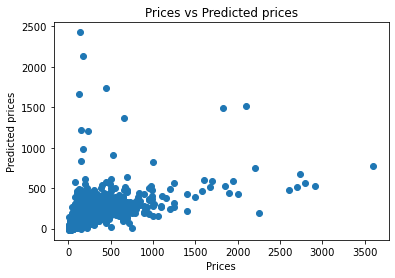

In [52]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

##### For Test Data

In [54]:
y_test_pred = lr.predict(X_test)

In [55]:
print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.45250974502149166
Adjusted R^2: 0.4382433580883571
MAE: 47.697511658245006
MSE: 11708.71092274384
RMSE: 108.20679702654468
